## LoanTap is an online platform committed to delivering customized loan products to millennials. They innovate in an otherwise dull loan segment, to deliver instant, flexible loans on consumer friendly terms to salaried professionals and businessmen.

## The data science team at LoanTap is building an underwriting layer to determine the creditworthiness of MSMEs as well as individuals.

# 1. Define Problem Statement

### Specifically, the data science team at LoanTap needs to develop a predictive model that can assess the creditworthiness of applicants based on a set of attributes. The model should classify applicants into two categories:

### 1. Eligible for a Personal Loan: Determine if an applicant should be granted a Personal Loan based on their creditworthiness and risk assessment.

### 2. Repayment Terms Recommendation: For eligible applicants, the model should recommend suitable repayment terms, including loan amount, interest rate, and tenure, based on the applicant's financial profile and risk profile.

### The goal is to improve the accuracy and efficiency of LoanTap's underwriting process, ensuring that the company can extend credit to deserving applicants while minimizing the risk of defaults. This case study will focus on the underwriting process for Personal Loans exclusively.







In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/003/549/original/logistic_regression.csv?1651045921')
data.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"


# 2. Exploratory Data Analysis

In [3]:
df = data.copy(deep=True)
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

In [5]:
cols = df.columns
cols

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'title',
       'dti', 'earliest_cr_line', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'application_type',
       'mort_acc', 'pub_rec_bankruptcies', 'address'],
      dtype='object')

In [6]:
for i in cols:
    print(f'No. of unique values in column {i} are : {df[i].nunique()}')

No. of unique values in column loan_amnt are : 1397
No. of unique values in column term are : 2
No. of unique values in column int_rate are : 566
No. of unique values in column installment are : 55706
No. of unique values in column grade are : 7
No. of unique values in column sub_grade are : 35
No. of unique values in column emp_title are : 173105
No. of unique values in column emp_length are : 11
No. of unique values in column home_ownership are : 6
No. of unique values in column annual_inc are : 27197
No. of unique values in column verification_status are : 3
No. of unique values in column issue_d are : 115
No. of unique values in column loan_status are : 2
No. of unique values in column purpose are : 14
No. of unique values in column title are : 48817
No. of unique values in column dti are : 4262
No. of unique values in column earliest_cr_line are : 684
No. of unique values in column open_acc are : 61
No. of unique values in column pub_rec are : 20
No. of unique values in column rev

In [7]:
## Statistical Summary

df.describe().T

,count,mean,std,min,25%,50%,75%,max
loan_amnt,396030.0,14113.888089,8357.441341,500.00,8000.00,12000.00,20000.00,40000.00
int_rate,396030.0,13.639400,4.472157,5.32,10.49,13.33,16.49,30.99
installment,396030.0,431.849698,250.727790,16.08,250.33,375.43,567.30,1533.81
annual_inc,396030.0,74203.175798,61637.621158,0.00,45000.00,64000.00,90000.00,8706582.00
dti,396030.0,17.379514,18.019092,0.00,11.28,16.91,22.98,9999.00
open_acc,396030.0,11.311153,5.137649,0.00,8.00,10.00,14.00,90.00
pub_rec,396030.0,0.178191,0.530671,0.00,0.00,0.00,0.00,86.00
revol_bal,396030.0,15844.539853,20591.836109,0.00,6025.00,11181.00,19620.00,1743266.00
revol_util,395754.0,53.791749,24.452193,0.00,35.80,54.80,72.90,892.30
total_acc,396030.0,25.414744,11.886991,2.00,17.00,24.00,32.00,151.00


In [8]:
numerical_cols=['loan_amnt','int_rate','installment','annual_inc','dti','open_acc','pub_rec','revol_bal','revol_util','total_acc','mort_acc','pub_rec_bankruptcies']

In [9]:
df.describe(include='object').T

,count,unique,top,freq
term,396030,2,36 months,302005
grade,396030,7,B,116018
sub_grade,396030,35,B3,26655
emp_title,373103,173105,Teacher,4389
emp_length,377729,11,10+ years,126041
home_ownership,396030,6,MORTGAGE,198348
verification_status,396030,3,Verified,139563
issue_d,396030,115,Oct-2014,14846
loan_status,396030,2,Fully Paid,318357
purpose,396030,14,debt_consolidation,234507


### Checking for missing values

In [10]:
df.isna().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
dtype: int64

## Univariate Analysis

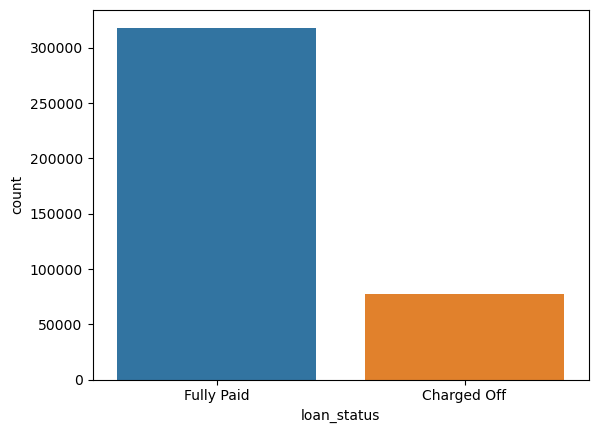

In [11]:
sns.countplot(data=df,x='loan_status')
plt.show()

In [12]:
df['loan_status'].value_counts(normalize=True)

Fully Paid     0.803871
Charged Off    0.196129
Name: loan_status, dtype: float64

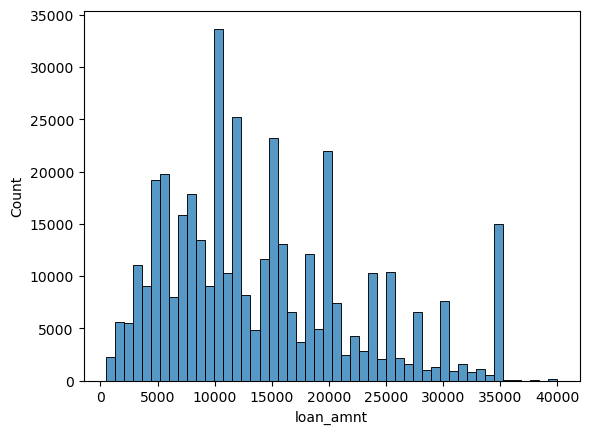

In [13]:
sns.histplot(df['loan_amnt'],bins=50)
plt.show()

In [14]:
numerical_cols

['loan_amnt',
 'int_rate',
 'installment',
 'annual_inc',
 'dti',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'mort_acc',
 'pub_rec_bankruptcies']

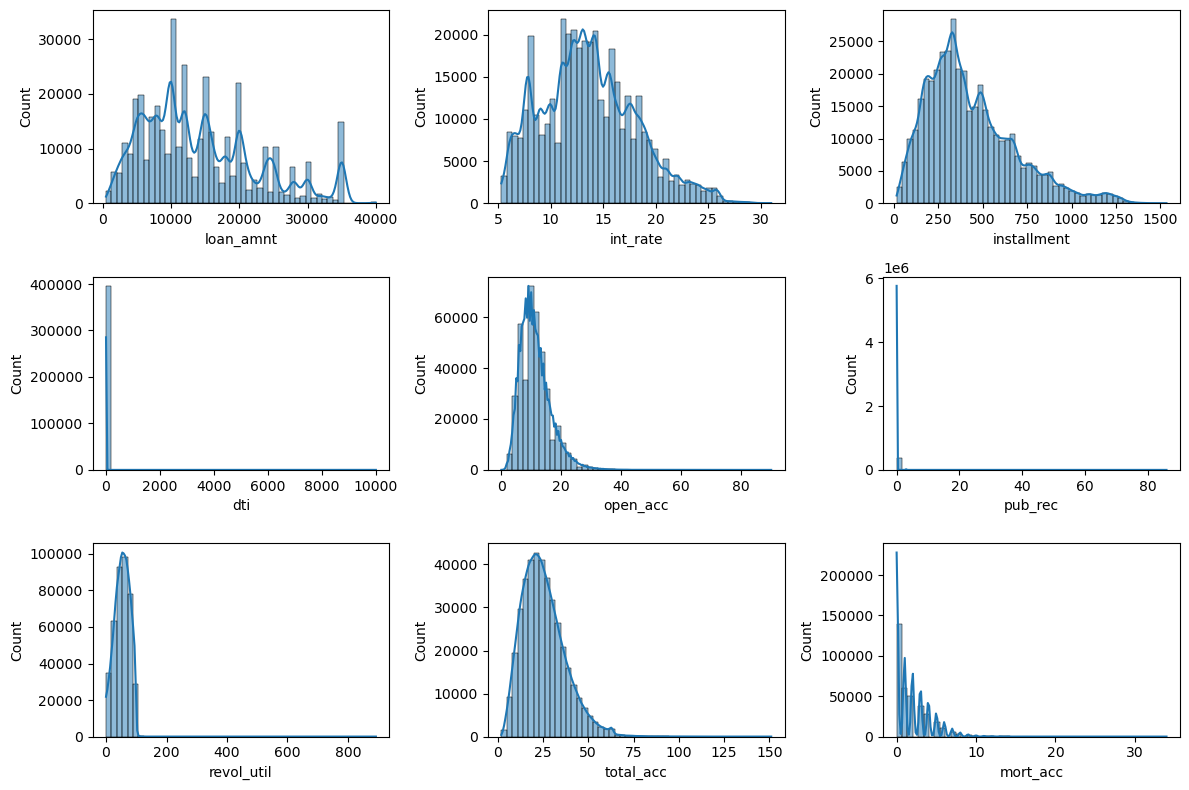

In [15]:
fig,axs = plt.subplots(3,3,figsize=(12,8))
for i in range(3):
    for j in range(3):
        index = i*4+j
        if index<len(numerical_cols):
            ax=axs[i,j]
            sns.histplot(df[numerical_cols[index]],kde=True,bins=50,ax=ax)
plt.tight_layout()
plt.show()
    

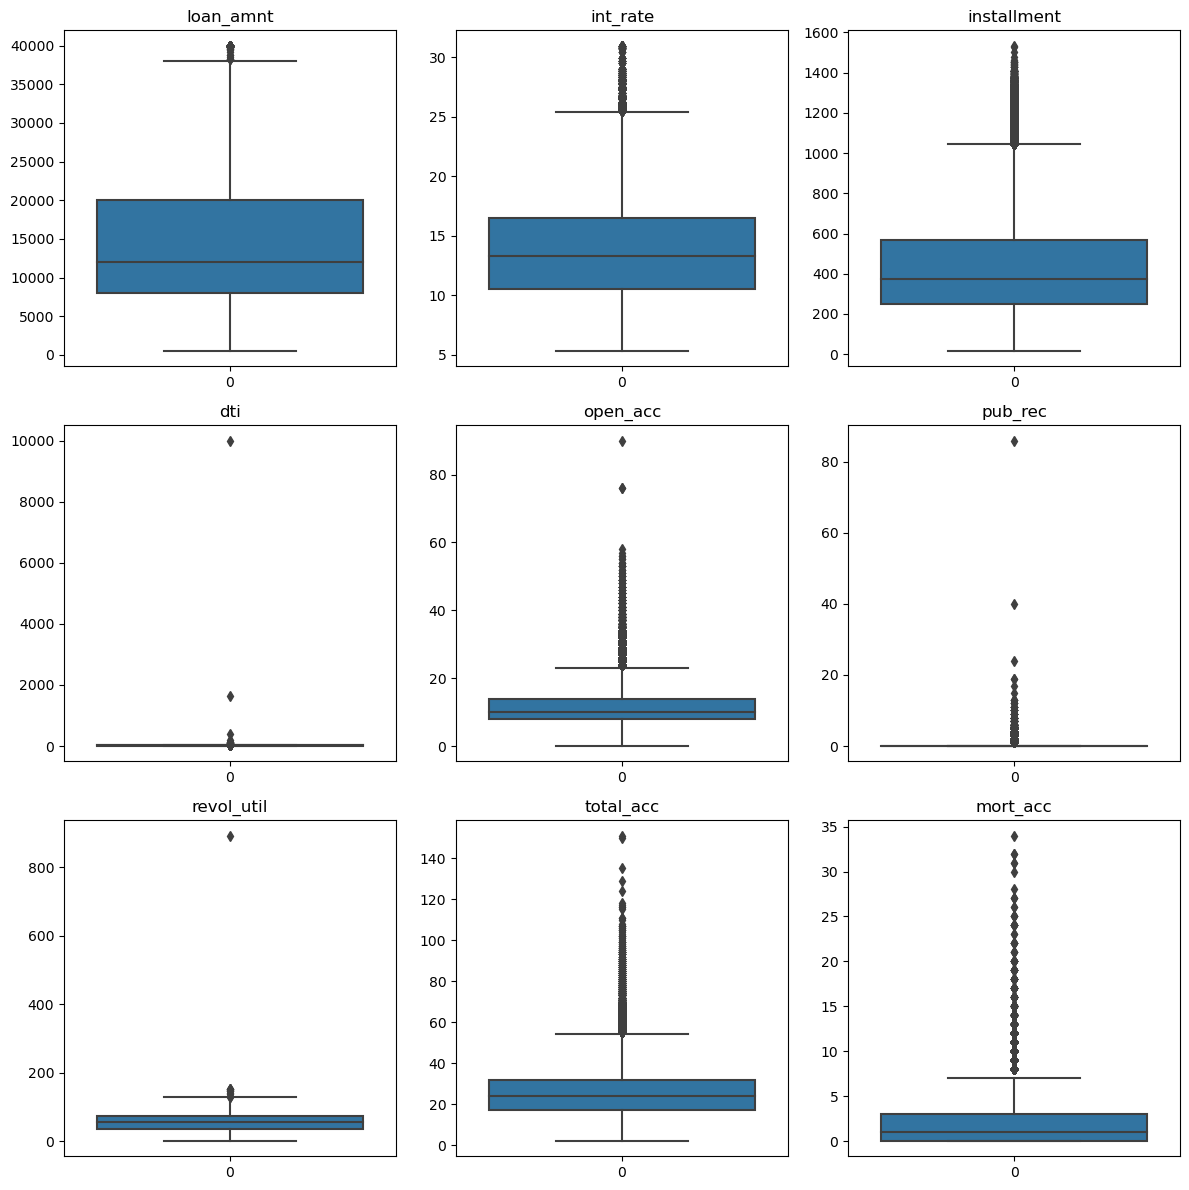

In [16]:
fig,axs = plt.subplots(3,3,figsize=(12,12))
for i in range(3):
    for j in range(3):
        index = i*4+j
        if index<len(numerical_cols):
            ax=axs[i,j]
            sns.boxplot(df[numerical_cols[index]],ax=ax)
            ax.set_title(numerical_cols[index])
plt.tight_layout()
plt.show()

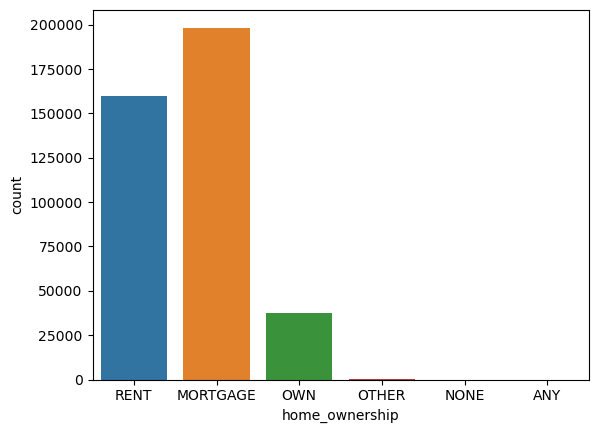

In [17]:
sns.countplot(data=df,x='home_ownership')
plt.show()

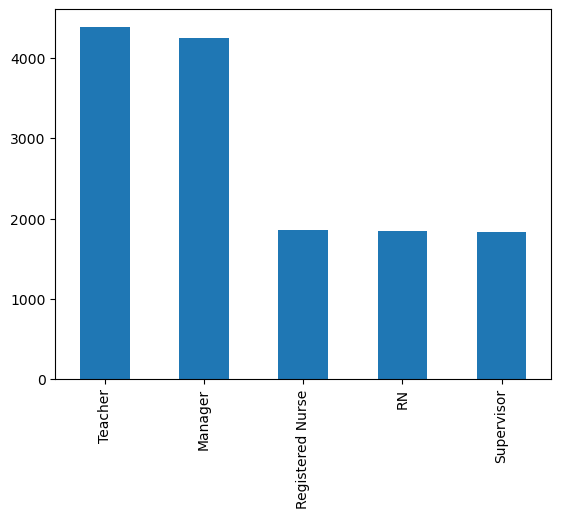

In [18]:
df['emp_title'].value_counts().head().plot(kind='bar')
plt.show()

## Bivariate Analysis

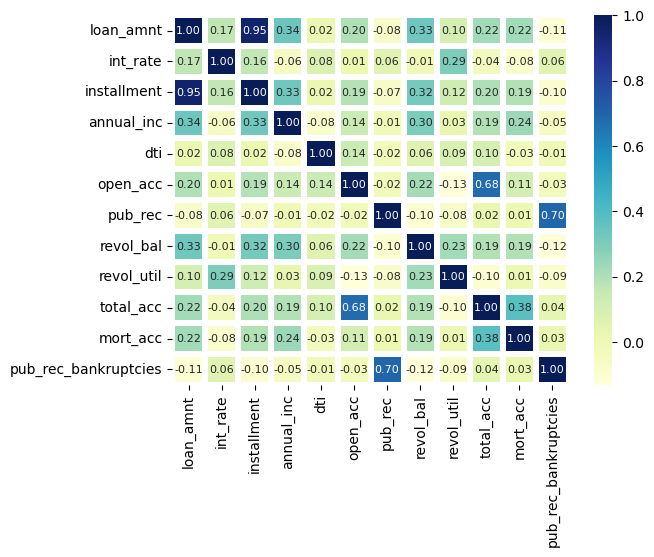

In [19]:
sns.heatmap(df.corr(),annot=True,cmap='YlGnBu',linewidth=3,annot_kws={'size':8},fmt=".2f")
plt.show()

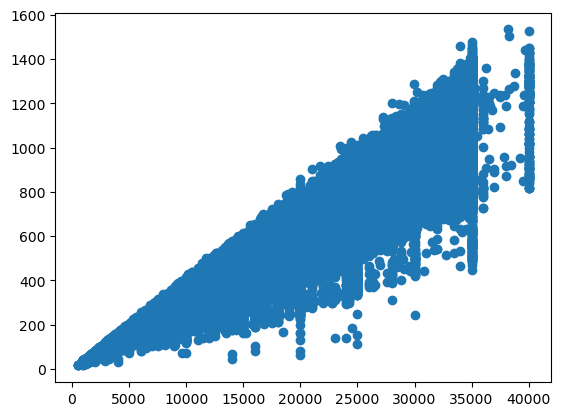

In [20]:
plt.scatter(df['loan_amnt'],df['installment'])
plt.show()

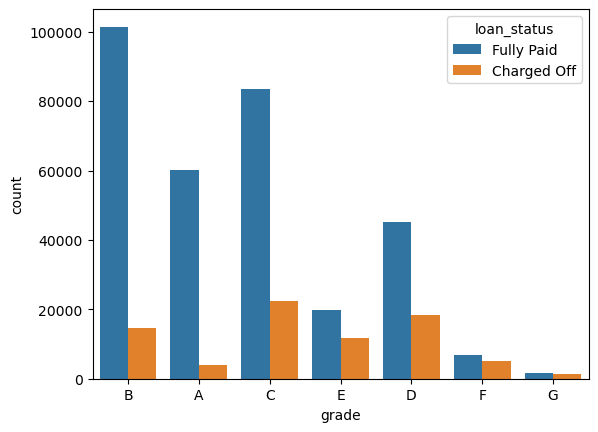

In [21]:
sns.countplot(data=df,x='grade',hue='loan_status')
plt.show()

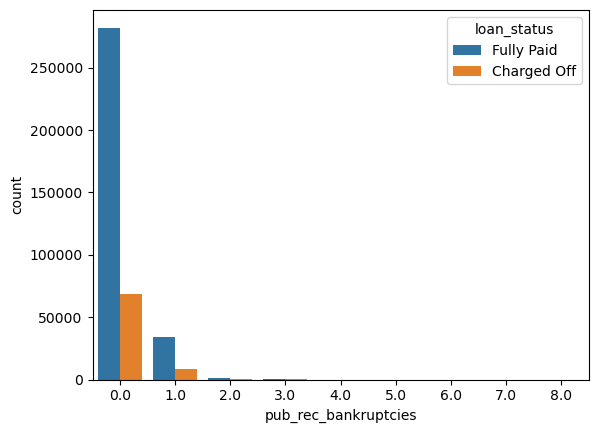

In [22]:
sns.countplot(data=df,x='pub_rec_bankruptcies',hue='loan_status')
plt.show()

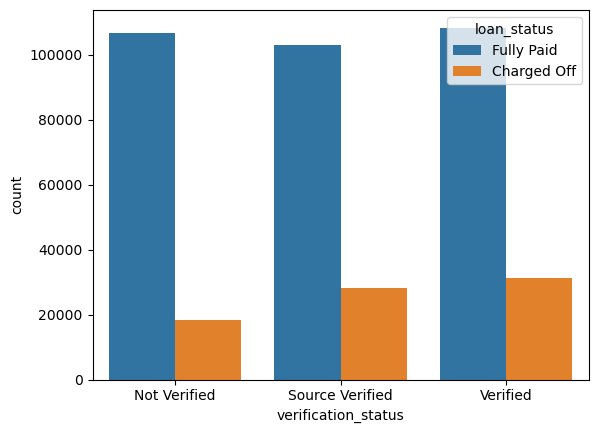

In [23]:
sns.countplot(data=df,x='verification_status',hue='loan_status')
plt.show()

# Data Preprocessing

### Duplicate value check

In [24]:
no_of_duplicated_vals=np.sum(df.duplicated())
print('No. of duplicated values in dataset are : ',no_of_duplicated_vals)

No. of duplicated values in dataset are :  0


In [25]:
## We need to drop highly correlated columns otherwise they will induce multi-collinearity into the model
df = df.drop(columns='installment')
df.head()

,loan_amnt,term,int_rate,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,B,B4,Marketing,10+ years,RENT,117000.0,Not Verified,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,Not Verified,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,B,B3,Statistician,< 1 year,RENT,43057.0,Source Verified,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,A,A2,Client Advocate,6 years,RENT,54000.0,Not Verified,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,Verified,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"


In [26]:
df['pub_rec'] = df['pub_rec'].apply(lambda x: 1 if x>1 else 0)
df['pub_rec'].unique()

array([0, 1], dtype=int64)

In [27]:
df['mort_acc'] = df['mort_acc'].apply(lambda x: 1 if x>1 else 0)
df['mort_acc'].unique()

array([0, 1], dtype=int64)

In [28]:
df['pub_rec_bankruptcies'] = df['pub_rec_bankruptcies'].apply(lambda x: 1 if x>1 else 0)
df['pub_rec_bankruptcies'].unique()

array([0, 1], dtype=int64)

In [29]:
df.head()

,loan_amnt,term,int_rate,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,B,B4,Marketing,10+ years,RENT,117000.0,Not Verified,...,16.0,0,36369.0,41.8,25.0,w,INDIVIDUAL,0,0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,Not Verified,...,17.0,0,20131.0,53.3,27.0,f,INDIVIDUAL,1,0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,B,B3,Statistician,< 1 year,RENT,43057.0,Source Verified,...,13.0,0,11987.0,92.2,26.0,f,INDIVIDUAL,0,0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,A,A2,Client Advocate,6 years,RENT,54000.0,Not Verified,...,6.0,0,5472.0,21.5,13.0,f,INDIVIDUAL,0,0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,Verified,...,13.0,0,24584.0,69.8,43.0,f,INDIVIDUAL,0,0,"679 Luna Roads\r\nGreggshire, VA 11650"


### Outlier detection and treatment

In [30]:
numerical_cols=['loan_amnt','int_rate','annual_inc','dti','open_acc','pub_rec','revol_bal','revol_util','total_acc','mort_acc','pub_rec_bankruptcies']
for i in numerical_cols:
    q1 = np.percentile(df[i],25)
    q3 = np.percentile(df[i],75)
    iqr = q3-q1
    upper_whisker = q3 + 1.5*iqr
    lower_whisker = q1 - 1.5*iqr
    print('IQR : ',np.round(iqr,2))
    print('upper_whisker : ',np.round(upper_whisker,2))
    print('lower_whisker : ',np.round(lower_whisker,2))
    print(f'No. of outliers present in column {i} : ',np.sum((df[i]>upper_whisker) | (df[i]<lower_whisker)))
    print('*'*50)

IQR :  12000.0
upper_whisker :  38000.0
lower_whisker :  -10000.0
No. of outliers present in column loan_amnt :  191
**************************************************
IQR :  6.0
upper_whisker :  25.49
lower_whisker :  1.49
No. of outliers present in column int_rate :  3777
**************************************************
IQR :  45000.0
upper_whisker :  157500.0
lower_whisker :  -22500.0
No. of outliers present in column annual_inc :  16700
**************************************************
IQR :  11.7
upper_whisker :  40.53
lower_whisker :  -6.27
No. of outliers present in column dti :  275
**************************************************
IQR :  6.0
upper_whisker :  23.0
lower_whisker :  -1.0
No. of outliers present in column open_acc :  10307
**************************************************
IQR :  0.0
upper_whisker :  0.0
lower_whisker :  0.0
No. of outliers present in column pub_rec :  8019
**************************************************
IQR :  13595.0
upper_whisker :  4001

In [31]:
# Outlier Treatment

numerical_cols=['loan_amnt','int_rate','annual_inc','dti','open_acc','revol_util','total_acc']
for i in numerical_cols:
    q1 = np.percentile(df[i],25)
    q3 = np.percentile(df[i],75)
    iqr = q3-q1
    upper_whisker = q3 + 1.5*iqr
    lower_whisker = q1 - 1.5*iqr
    
    df[i] = np.where(df[i]>upper_whisker,upper_whisker,df[i])
    df[i] = np.where(df[i]<lower_whisker,lower_whisker,df[i])

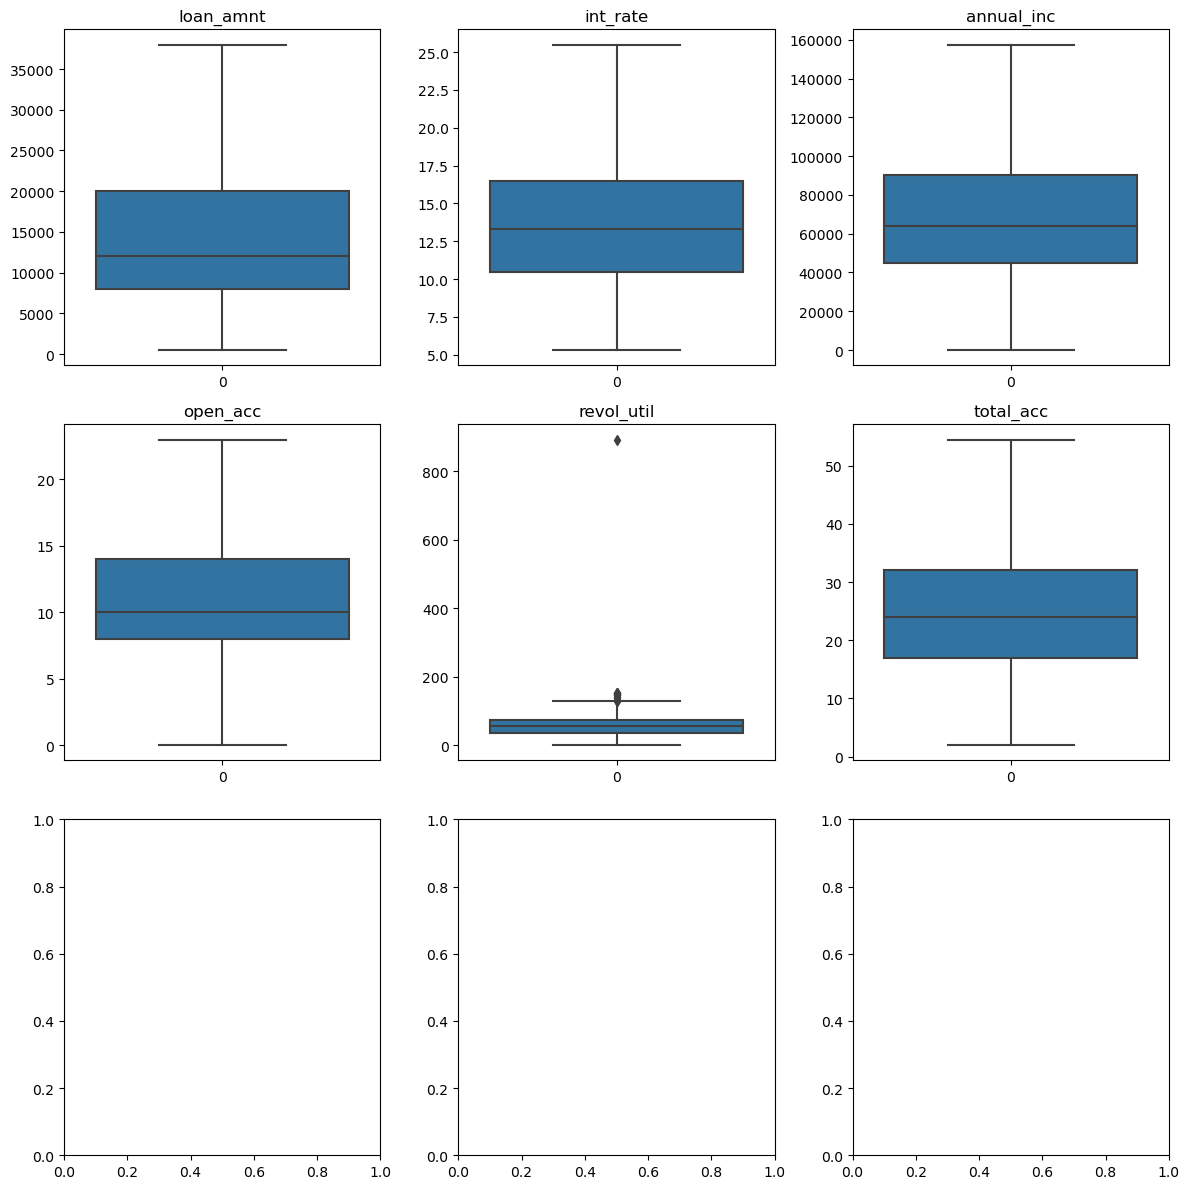

In [32]:
fig,axs = plt.subplots(3,3,figsize=(12,12))
for i in range(3):
    for j in range(3):
        index = i*4+j
        if index<len(numerical_cols):
            ax=axs[i,j]
            sns.boxplot(df[numerical_cols[index]],ax=ax)
            ax.set_title(numerical_cols[index])
plt.tight_layout()
plt.show()

In [33]:
df.head()

,loan_amnt,term,int_rate,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,B,B4,Marketing,10+ years,RENT,117000.0,Not Verified,...,16.0,0,36369.0,41.8,25.0,w,INDIVIDUAL,0,0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,Not Verified,...,17.0,0,20131.0,53.3,27.0,f,INDIVIDUAL,1,0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,B,B3,Statistician,< 1 year,RENT,43057.0,Source Verified,...,13.0,0,11987.0,92.2,26.0,f,INDIVIDUAL,0,0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,A,A2,Client Advocate,6 years,RENT,54000.0,Not Verified,...,6.0,0,5472.0,21.5,13.0,f,INDIVIDUAL,0,0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,Verified,...,13.0,0,24584.0,69.8,43.0,f,INDIVIDUAL,0,0,"679 Luna Roads\r\nGreggshire, VA 11650"


### Feature Engineering

In [34]:
df['initial_list_status'] = df['initial_list_status'].replace({'w':0,'f':1})

In [35]:
df['initial_list_status'].unique()

array([0, 1], dtype=int64)

In [36]:
df['term']=df['term'].replace({' 36 months':36,' 60 months':60})

In [37]:
df['term'].unique()

array([36, 60], dtype=int64)

In [38]:
df['loan_status'].unique()

array(['Fully Paid', 'Charged Off'], dtype=object)

In [39]:
df['loan_status'] = np.where(df['loan_status']=='Fully Paid',1,0)

In [40]:
df['loan_status'].unique()

array([1, 0])

In [41]:
df['zip_codes'] = df['address'].apply(lambda x:x[-5:])
df['zip_codes']

0         22690
1         05113
2         05113
3         00813
4         11650
          ...  
396025    30723
396026    05113
396027    70466
396028    29597
396029    48052
Name: zip_codes, Length: 396030, dtype: object

In [42]:
df.head()

,loan_amnt,term,int_rate,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,...,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,zip_codes
0,10000.0,36,11.44,B,B4,Marketing,10+ years,RENT,117000.0,Not Verified,...,0,36369.0,41.8,25.0,0,INDIVIDUAL,0,0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690",22690
1,8000.0,36,11.99,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,Not Verified,...,0,20131.0,53.3,27.0,1,INDIVIDUAL,1,0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113",05113
2,15600.0,36,10.49,B,B3,Statistician,< 1 year,RENT,43057.0,Source Verified,...,0,11987.0,92.2,26.0,1,INDIVIDUAL,0,0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113",05113
3,7200.0,36,6.49,A,A2,Client Advocate,6 years,RENT,54000.0,Not Verified,...,0,5472.0,21.5,13.0,1,INDIVIDUAL,0,0,"823 Reid Ford\r\nDelacruzside, MA 00813",00813
4,24375.0,60,17.27,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,Verified,...,0,24584.0,69.8,43.0,1,INDIVIDUAL,0,0,"679 Luna Roads\r\nGreggshire, VA 11650",11650


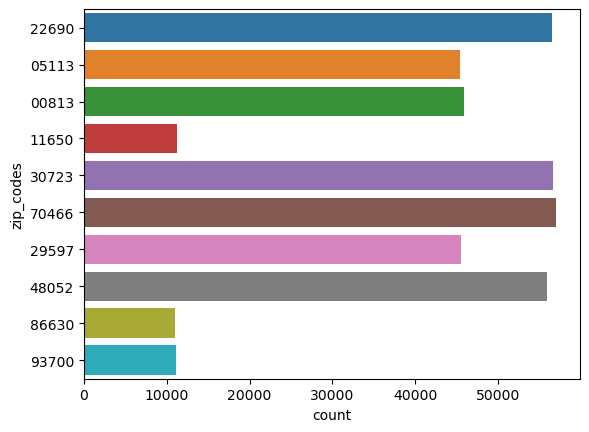

In [43]:
sns.countplot(data=df,y='zip_codes')
plt.show()

In [44]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'title', 'dti', 'earliest_cr_line',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'application_type', 'mort_acc',
       'pub_rec_bankruptcies', 'address', 'zip_codes'],
      dtype='object')

In [45]:
# Dropping some unnecessary columns

df.drop(columns=['sub_grade','emp_title','emp_length','issue_d','title','earliest_cr_line','open_acc','address'],inplace=True)

In [46]:
df.head()

,loan_amnt,term,int_rate,grade,home_ownership,annual_inc,verification_status,loan_status,purpose,dti,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,zip_codes
0,10000.0,36,11.44,B,RENT,117000.0,Not Verified,1,vacation,26.24,0,36369.0,41.8,25.0,0,INDIVIDUAL,0,0,22690
1,8000.0,36,11.99,B,MORTGAGE,65000.0,Not Verified,1,debt_consolidation,22.05,0,20131.0,53.3,27.0,1,INDIVIDUAL,1,0,05113
2,15600.0,36,10.49,B,RENT,43057.0,Source Verified,1,credit_card,12.79,0,11987.0,92.2,26.0,1,INDIVIDUAL,0,0,05113
3,7200.0,36,6.49,A,RENT,54000.0,Not Verified,1,credit_card,2.60,0,5472.0,21.5,13.0,1,INDIVIDUAL,0,0,00813
4,24375.0,60,17.27,C,MORTGAGE,55000.0,Verified,0,credit_card,33.95,0,24584.0,69.8,43.0,1,INDIVIDUAL,0,0,11650


In [47]:
df.dtypes

loan_amnt               float64
term                      int64
int_rate                float64
grade                    object
home_ownership           object
annual_inc              float64
verification_status      object
loan_status               int32
purpose                  object
dti                     float64
pub_rec                   int64
revol_bal               float64
revol_util              float64
total_acc               float64
initial_list_status       int64
application_type         object
mort_acc                  int64
pub_rec_bankruptcies      int64
zip_codes                object
dtype: object

#### One hot encoding

In [48]:
dummies=['grade','home_ownership','verification_status','purpose','application_type','zip_codes']
df = pd.get_dummies(df,columns=dummies,drop_first=True)

In [49]:
df.head()

,loan_amnt,term,int_rate,annual_inc,loan_status,dti,pub_rec,revol_bal,revol_util,total_acc,...,application_type_JOINT,zip_codes_05113,zip_codes_11650,zip_codes_22690,zip_codes_29597,zip_codes_30723,zip_codes_48052,zip_codes_70466,zip_codes_86630,zip_codes_93700
0,10000.0,36,11.44,117000.0,1,26.24,0,36369.0,41.8,25.0,...,0,0,0,1,0,0,0,0,0,0
1,8000.0,36,11.99,65000.0,1,22.05,0,20131.0,53.3,27.0,...,0,1,0,0,0,0,0,0,0,0
2,15600.0,36,10.49,43057.0,1,12.79,0,11987.0,92.2,26.0,...,0,1,0,0,0,0,0,0,0,0
3,7200.0,36,6.49,54000.0,1,2.60,0,5472.0,21.5,13.0,...,0,0,0,0,0,0,0,0,0,0
4,24375.0,60,17.27,55000.0,0,33.95,0,24584.0,69.8,43.0,...,0,0,1,0,0,0,0,0,0,0


In [50]:
df.dtypes

loan_amnt                              float64
term                                     int64
int_rate                               float64
annual_inc                             float64
loan_status                              int32
dti                                    float64
pub_rec                                  int64
revol_bal                              float64
revol_util                             float64
total_acc                              float64
initial_list_status                      int64
mort_acc                                 int64
pub_rec_bankruptcies                     int64
grade_B                                  uint8
grade_C                                  uint8
grade_D                                  uint8
grade_E                                  uint8
grade_F                                  uint8
grade_G                                  uint8
home_ownership_MORTGAGE                  uint8
home_ownership_NONE                      uint8
home_ownershi

In [51]:
df.shape

(396030, 50)

In [52]:
df.isna().sum()

loan_amnt                                0
term                                     0
int_rate                                 0
annual_inc                               0
loan_status                              0
dti                                      0
pub_rec                                  0
revol_bal                                0
revol_util                             276
total_acc                                0
initial_list_status                      0
mort_acc                                 0
pub_rec_bankruptcies                     0
grade_B                                  0
grade_C                                  0
grade_D                                  0
grade_E                                  0
grade_F                                  0
grade_G                                  0
home_ownership_MORTGAGE                  0
home_ownership_NONE                      0
home_ownership_OTHER                     0
home_ownership_OWN                       0
home_owners

In [53]:
revol_util_mean=np.round(df['revol_util'].mean(),2)
df['revol_util'].fillna(revol_util_mean,inplace=True)

In [54]:
df.isna().sum()

loan_amnt                              0
term                                   0
int_rate                               0
annual_inc                             0
loan_status                            0
dti                                    0
pub_rec                                0
revol_bal                              0
revol_util                             0
total_acc                              0
initial_list_status                    0
mort_acc                               0
pub_rec_bankruptcies                   0
grade_B                                0
grade_C                                0
grade_D                                0
grade_E                                0
grade_F                                0
grade_G                                0
home_ownership_MORTGAGE                0
home_ownership_NONE                    0
home_ownership_OTHER                   0
home_ownership_OWN                     0
home_ownership_RENT                    0
verification_sta

### All missing values handled

### Scaling

In [55]:
X = df.drop(columns='loan_status')
X.head()

,loan_amnt,term,int_rate,annual_inc,dti,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,...,application_type_JOINT,zip_codes_05113,zip_codes_11650,zip_codes_22690,zip_codes_29597,zip_codes_30723,zip_codes_48052,zip_codes_70466,zip_codes_86630,zip_codes_93700
0,10000.0,36,11.44,117000.0,26.24,0,36369.0,41.8,25.0,0,...,0,0,0,1,0,0,0,0,0,0
1,8000.0,36,11.99,65000.0,22.05,0,20131.0,53.3,27.0,1,...,0,1,0,0,0,0,0,0,0,0
2,15600.0,36,10.49,43057.0,12.79,0,11987.0,92.2,26.0,1,...,0,1,0,0,0,0,0,0,0,0
3,7200.0,36,6.49,54000.0,2.60,0,5472.0,21.5,13.0,1,...,0,0,0,0,0,0,0,0,0,0
4,24375.0,60,17.27,55000.0,33.95,0,24584.0,69.8,43.0,1,...,0,0,1,0,0,0,0,0,0,0


In [56]:
y = df['loan_status']
y

0         1
1         1
2         1
3         1
4         0
         ..
396025    1
396026    1
396027    1
396028    1
396029    1
Name: loan_status, Length: 396030, dtype: int32

In [57]:
y.value_counts(normalize=True)

1    0.803871
0    0.196129
Name: loan_status, dtype: float64

In [58]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [59]:
(X_train.shape,y_train.shape)

((277221, 49), (277221,))

In [60]:
(X_test.shape,y_test.shape)

((118809, 49), (118809,))

In [61]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [62]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [63]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

### Handling Imbalanced data

In [64]:
from imblearn.over_sampling import SMOTE
sm = SMOTE()
X_train,y_train = sm.fit_resample(X_train,y_train)

In [65]:
y_train.value_counts()

1    222918
0    222918
Name: loan_status, dtype: int64

In [66]:
model.fit(X_train,y_train)

LogisticRegression()

In [67]:
y_pred = model.predict(X_test)
y_pred

array([0, 1, 0, ..., 1, 1, 1])

### Metrics

In [68]:
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score,classification_report,confusion_matrix,ConfusionMatrixDisplay

In [69]:
print('Accuracy of the model is ',accuracy_score(y_test,y_pred))

Accuracy of the model is  0.7953858714407158


In [70]:
print('F1 score is ',f1_score(y_test,y_pred))

F1 score is  0.8614972652689151


In [71]:
print('Precision score is ',precision_score(y_test,y_pred))

Precision score is  0.9441065920755235


In [72]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.49      0.81      0.61     23370
           1       0.94      0.79      0.86     95439

    accuracy                           0.80    118809
   macro avg       0.72      0.80      0.74    118809
weighted avg       0.85      0.80      0.81    118809



In [73]:
cm = confusion_matrix(y_true=y_test,y_pred=y_pred)
cm

array([[18894,  4476],
       [19834, 75605]], dtype=int64)

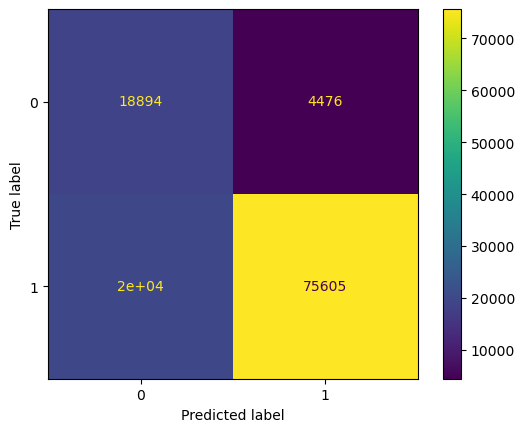

In [74]:
ConfusionMatrixDisplay(cm).plot();

In [75]:
weights=model.coef_
weights = np.abs(weights)
weights

array([[ 0.59677614,  0.40476885,  0.44882915,  1.31386261,  1.0700971 ,
         0.10289032,  1.68543466,  3.50546747,  0.20630985,  0.0223522 ,
         0.05758053,  0.07660744,  0.50326028,  0.89498954,  1.15649761,
         1.27881405,  1.34098962,  1.37337175,  1.42118343,  0.7155297 ,
         1.51426677,  1.29429342,  1.1884752 ,  0.18629   ,  0.07778933,
         0.31849416,  0.41223564,  0.3291772 ,  0.49254976,  0.05105352,
         0.3958364 ,  0.43176949,  0.47874004,  0.4140801 ,  0.1363619 ,
         0.79331311,  0.28569515,  0.2813765 ,  0.23250343,  1.62506117,
        10.23648894, 13.67799912,  6.16178842, 10.24026393,  6.13063554,
         6.19145422,  6.15626775, 13.55772089, 13.62304925]])

In [76]:
feature_importance = pd.DataFrame(weights.reshape(1,-1),columns=X.columns)
feature_importance=feature_importance.T.reset_index()
feature_importance.rename(columns={'index':'features',0:'weights'},inplace=True)

In [77]:
feature_importance=feature_importance.sort_values(by='weights',ascending=False).reset_index(drop=True)
feature_importance

,features,weights
0,zip_codes_11650,13.677999
1,zip_codes_93700,13.623049
2,zip_codes_86630,13.557721
3,zip_codes_29597,10.240264
4,zip_codes_05113,10.236489
5,zip_codes_48052,6.191454
6,zip_codes_22690,6.161788
7,zip_codes_70466,6.156268
8,zip_codes_30723,6.130636
9,revol_util,3.505467


### We need to detect loan defaulters and minimize False Positives on one hand and also we have to reduce NPAs by not disbursing loans to anyone which is incapable of paying back. So, keeping both the criteria in mind F1 score as a metric should be prioritized instead of just focusing either on Precision or Recall as the solo metric.

In [78]:
print('F1 score is ',f1_score(y_test,y_pred))

F1 score is  0.8614972652689151


In [79]:
from sklearn.metrics import roc_curve, roc_auc_score, auc

In [80]:
y_pred_prob = model.predict_proba(X_test)[:, 1]

In [81]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

In [82]:
roc_auc = auc(fpr, tpr)

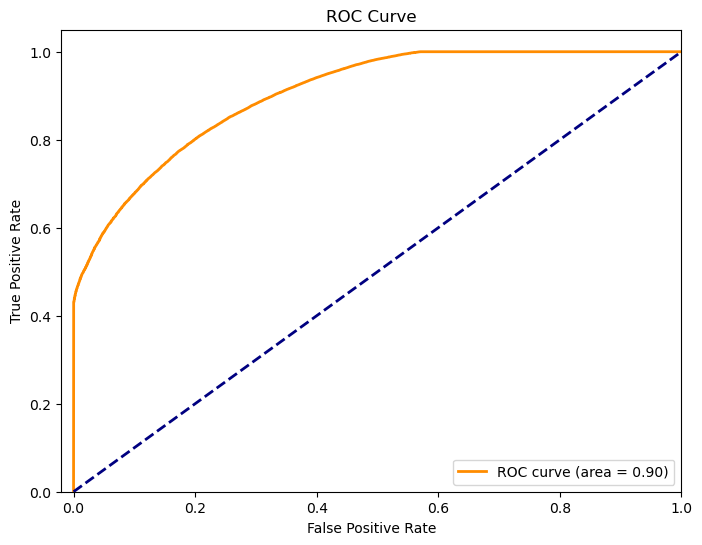

In [83]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([-0.02, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

#### Here the FPR is 0 till when TPR reaches 0.4 and then afterwards TPR steadily increases along with increasing FPR.

In [84]:
from sklearn.metrics import precision_recall_curve

In [85]:
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob)

In [86]:
auc_recall_precision = auc(recall,precision)

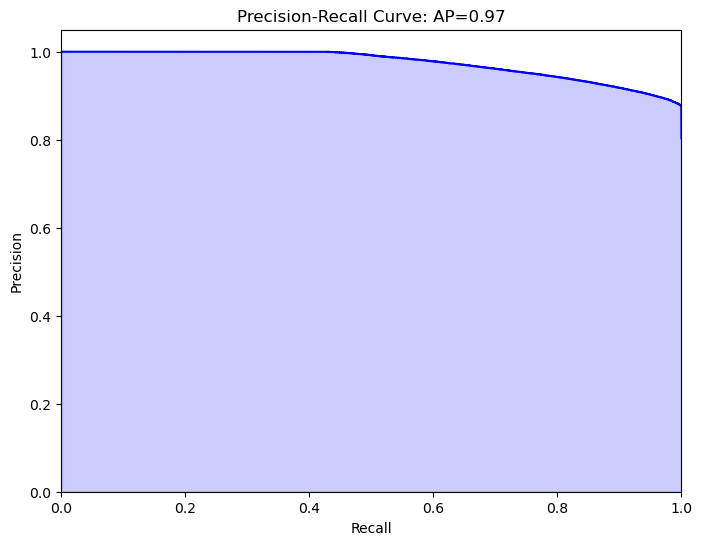

In [87]:
plt.figure(figsize=(8, 6))
plt.step(recall, precision, color='b', where='post')
plt.fill_between(recall, precision, alpha=0.2, color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall Curve: AP={0:0.2f}'.format(auc_recall_precision))
plt.show()

## Actionable Insights

#### 1. There are 80% people with loan status as Fully Paid and 20% people with loan status as Charged Off.
#### 2. MORTAGE and RENT are two largest home ownership.
#### 3. Teacher and Manager are two largest occupations.
#### 4. There is very high correlation between loan amount and installments.
#### 5. People with loan grade 'B' has the highest Fully Paid loan status.
#### 6. People with public_rec_bankruptcies as 0 has the highest no. of Fully paid loans.
#### 7. Loan status as Fully Paid is similar for all verification_status.
#### 8. F1 score as a metric is prioritized here because it's unfair to choose just one i.e. Precision or Recall.
#### 9. Very high feature-importance is given to zip_codes that means geographical locations have very high weightage in prediction.
#### 10. Area under ROC-AUC curve turns out to be 0.9 while area under Precision-Recall curve turns out to be 0.97. 

## Business Recommendations

### 1. Risk Mitigation Strategy:

#### Focus on developing strategies to mitigate the risk associated with the 20% of applicants classified as "Charged Off." This could involve implementing stricter criteria or additional verification steps for applicants falling into this category.

### 2. Tailored Loan Products:

#### Leverage the high correlation between loan amount and installments to tailor loan products that are more flexible and personalized for individual applicants. This could enhance customer satisfaction and repayment capabilities.

### 3. Occupation-Based Customization:

#### Since Teacher and Manager are the two largest occupations, consider customizing loan products or marketing efforts specifically targeting these segments. Understanding the financial behaviors and preferences of these occupations could lead to more effective underwriting.

### 4. Credit Grade 'B' Analysis:

#### Further investigate the characteristics of individuals with loan grade 'B' to understand why they have the highest rate of Fully Paid loans. Use this information to refine the underwriting criteria for other applicants and improve the overall loan approval process.

### 5. Bankruptcy Impact:

#### Given that individuals with public_rec_bankruptcies as 0 have the highest number of Fully Paid loans, consider incorporating this factor more prominently in the creditworthiness assessment. Develop strategies to differentiate between applicants with and without bankruptcies effectively.

### 6. Geographical Considerations:

#### Acknowledge the high feature importance of zip codes in the predictive model. Consider tailoring loan products or risk assessment criteria based on geographical locations. This could involve adjusting interest rates or loan terms based on the perceived risk associated with specific regions.

### 7. Performance Metric Consideration:

#### Since F1 score is prioritized and provides a balance between precision and recall, continue to use it as the primary metric for model evaluation. Regularly monitor and update the model based on its F1 score performance.

### 8. ROC-AUC and Precision-Recall Analysis:

#### While the ROC-AUC curve has a high value (0.9), the Precision-Recall curve has an even higher value (0.97). This indicates a strong model performance, especially in correctly classifying positive instances. Consider incorporating this information into the model evaluation process and possibly adjusting the classification threshold for better precision.

##### By incorporating these recommendations, LoanTap can enhance its underwriting process, minimize default risks, and provide more tailored and effective loan products to its customers. Regularly updating and refining the predictive model based on ongoing data analysis will be crucial for long-term success.